In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.
Path to dataset files: /kaggle/input/chest-xray-pneumonia


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the data

train = "/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train"
test = "/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test"
val = "/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val"

# Image Dimensions
img_width , img_height = 224 , 224
input_shape = (img_width, img_height, 3)

# Data augmentation and normalization for training
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only rescaling for validation
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


# Load the training data

train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

# Load the validation data

val_generator = val_datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

# Load the Test data
test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [3]:
images , labels = next(train_generator)

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32 , (3,3) , activation='relu',input_shape = input_shape),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64 , (3,3) , activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128 , (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512 , activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1 , activation='sigmoid')
])

model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    epochs = 10,
    validation_data = val_generator,
    validation_steps = val_generator.samples // val_generator.batch_size
)

model.save("CNN_model.keras")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 154s 890ms/step - accuracy: 0.7776 - loss: 0.5633 - val_accuracy: 0.7500 - val_loss: 0.3819
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 170s 738ms/step - accuracy: 0.8952 - loss: 0.2496 - val_accuracy: 0.6250 - val_loss: 1.5014
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 120s 735ms/step - accuracy: 0.9135 - loss: 0.2252 - val_accuracy: 0.8125 - val_loss: 0.4705
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 733ms/step - accuracy: 0.9275 - loss: 0.1855 - val_accuracy: 0.8125 - val_loss: 0.4229
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 740ms/step - accuracy: 0.9242 - loss: 0.1993 - val_accuracy: 0.6875 - val_loss: 0.6279
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 120s 733ms/step - accuracy: 0.9356 - loss: 0.1649 - val_accuracy: 0.7500 - val_loss: 0.4573
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 122s 747ms/step - accuracy: 0.9365 - loss: 0.1571 - val_accuracy: 0.6250 - val_loss: 0.8300
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 121s 741ms/step - accuracy: 0.9391 -

## Fine Tune Other Modesl

In [7]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2, EfficientNetB0
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def build_model(base_model, input_shape=(224,224,3)):
    base = base_model(weights="imagenet", include_top=False, input_shape=input_shape)
    base.trainable = False  # Freeze base layers for transfer learning

    x = base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base.input, outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
models_to_try = {
    "VGG16": VGG16,
    "ResNet50": ResNet50,
    "MobileNetV2": MobileNetV2,
}

histories = {}
accuracies = {}

for name, base in models_to_try.items():
    print(f"\n🔹 Training {name}...")
    model = build_model(base, input_shape=(224,224,3))
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=10,
        validation_data=val_generator,
        validation_steps=val_generator.samples // val_generator.batch_size,
        verbose=1
    )
    histories[name] = history
    accuracies[name] = max(history.history['val_accuracy'])
    model.save(f"{name}_model.keras")



🔹 Training VGG16...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 156s 837ms/step - accuracy: 0.7829 - loss: 0.4559 - val_accuracy: 0.7500 - val_loss: 0.6804
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 128s 785ms/step - accuracy: 0.9053 - loss: 0.2270 - val_accuracy: 0.7500 - val_loss: 0.6707
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 786ms/step - accuracy: 0.9224 - loss: 0.1920 - val_accuracy: 0.7500 - val_loss: 0.5511
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 127s 782ms/step - accuracy: 0.9325 - loss: 0.1702 - val_accuracy: 0.7500 - val_loss: 0.5130
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 779ms/step - accuracy: 0.9425 - loss: 0.1562 - val_accuracy: 0.7500 - val_loss: 0.3900
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 782ms/step - accuracy: 0.9276 - loss: 0.1823 - val_accuracy: 0.7500 - val_loss: 0.7603
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 131s 798ms/step - accuracy: 0.9337 - loss: 0.1695 - val_accuracy: 0.7500 - val_loss: 0.7265
Epoc

In [8]:
print(f"\n🔹 Training mobile_net...")
model = build_model(MobileNetV2, input_shape=(224,224,3))
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    verbose=1
)

# Save MobileNetV2 after training
model.save("MobileNetV2_model.keras")


🔹 Training mobile_net...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.8818 - loss: 0.2801 - val_accuracy: 0.9375 - val_loss: 0.2377
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.9382 - loss: 0.1581 - val_accuracy: 0.8125 - val_loss: 0.2239
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 222s 1s/step - accuracy: 0.9536 - loss: 0.1232 - val_accuracy: 0.8125 - val_loss: 0.3676
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.9585 - loss: 0.1062 - val_accuracy: 0.8125 - val_loss: 0.2562
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.9623 - loss: 0.0955 - val_accuracy: 0.8750 - val_loss: 0.2480
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.9520 - loss: 0.1175 - val_accuracy: 0.8750 - val_loss: 0.2109
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.9590 - loss: 0.1002 - val_accuracy: 0.8750 - val_loss: 0.2692
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.9632 - loss: 0.0982 - val_accu

In [9]:
cnn_model = tf.keras.models.load_model("CNN_model.keras")
resnet_model = tf.keras.models.load_model("ResNet50_model.keras")
vgg16_model = tf.keras.models.load_model("VGG16_model.keras")
mobilenet_model = tf.keras.models.load_model("MobileNetV2_model.keras")


In [10]:
# Dictionary to store evaluation results
results = {}

results["MobileNetV2"] = mobilenet_model.evaluate(val_generator, verbose=0)[1]  # accuracy
results["CNN"] = cnn_model.evaluate(val_generator, verbose=0)[1]
results["ResNet50"] = resnet_model.evaluate(val_generator, verbose=0)[1]
results["VGG16"] = vgg16_model.evaluate(val_generator, verbose=0)[1]

print("\n📊 Model Accuracies:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")



📊 Model Accuracies:
MobileNetV2: 0.8125
CNN: 0.7500
ResNet50: 0.6875
VGG16: 0.7500


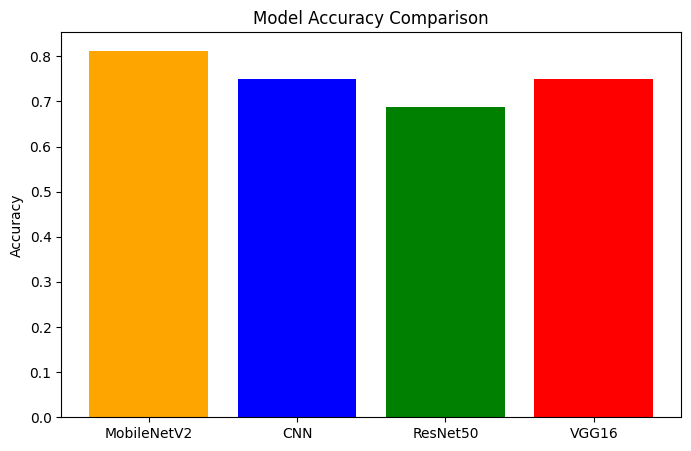


✅ Best model is MobileNetV2 with accuracy 0.8125


In [11]:
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color=["orange","blue","green","red"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

best_model_name = max(results, key=results.get)
print(f"\n✅ Best model is {best_model_name} with accuracy {results[best_model_name]:.4f}")
